<a href="https://colab.research.google.com/github/tatiata/lab-work/blob/main/%D0%9B%D0%B0%D0%B1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключаем библиотеки

In [ ]:
from numpy.random import seed
from numpy.random import randn


from numpy import mean
from numpy import std

# для гистограммы и QQ Plot 
from matplotlib import pyplot 



# Тестовый набор данных 

In [ ]:
seed(1)
data = 5*randn(100)+50

При выполнении примера генерируется образец и выводится среднее значение и
стандартное отклонение образца

In [ ]:
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


# Визуальные проверки нормальности

**График гистограммы**

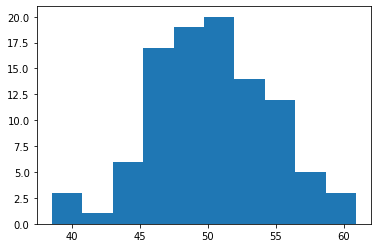

In [ ]:
pyplot.hist(data)
pyplot.show()

**QQ Plod**

In [ ]:
from statsmodels.graphics.gofplots import qqplot

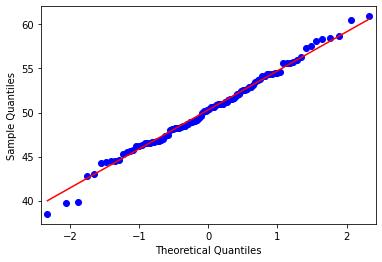

In [ ]:
qqplot(data, line='s')
pyplot.show()

# Cтатистические тесты нормальности

**Тест Шапиро-Вилка**

In [ ]:
from scipy.stats import shapiro

In [ ]:
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian(fail to reject H0)')
else:
  print('Sample does not looks Gaussian(reject H0)')


Statistics=0.992, p=0.822
Sample looks Gaussian(fail to reject H0)


**Тест д'Агостино на K^2**

In [ ]:
from scipy.stats import normaltest

In [ ]:
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian(fail to reject H0)')
else:
  print('Sample does not looks Gaussian(reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian(fail to reject H0)


**Тест Андерсона-Дарлинга**

In [ ]:
from scipy.stats import anderson

In [ ]:
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p=0 
for i in range(len(result.critical_values)):
  s1, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (s1, cv))
  else:
    print('%.3f: %.3f, data does not looks normal (reject H0)' % (s1, cv))


Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


# **18** **ВАРИАНТ**

Подключаем библиотеки

In [ ]:
from numpy.random import seed
from numpy.random import randn


from numpy import mean
from numpy import std

# для гистограммы и QQ Plot 
from matplotlib import pyplot 

# Данные

In [ ]:
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_horror_films'
req=requests.get(url)
data1=pd.read_html(req.text)
df=data1[0]

Обработка данных

In [ ]:
df['Worldwide gross']=df['Worldwide gross'].str.replace(r"$","").str.replace(r",","")

In [ ]:
df['Worldwide gross']=df['Worldwide gross'].astype('float')

In [ ]:
df['Year']=df['Year'].astype('float')

In [ ]:
df.drop(['Ref', 'Rank', 'Franchise or basis'],axis=1,inplace=True)
df

,Film,Worldwide gross,Year,Studio
0,It,700381748.0,2017.0,New Line Cinema
1,The Sixth Sense,672806292.0,1999.0,Hollywood Pictures
2,War of the Worlds,603873119.0,2005.0,Amblin Entertainment
3,I Am Legend,585349010.0,2007.0,Village Roadshow Pictures
4,World War Z,540007876.0,2013.0,Skydance Productions
5,The Meg,530243742.0,2018.0,Warner Bros. Pictures
6,Godzilla,529076069.0,2014.0,Legendary Pictures
7,It Chapter Two,473093228.0,2019.0,Warner Bros. Pictures
8,Jaws,470653000.0,1975.0,Universal Pictures
9,Demon Slayer: Mugen Train,444500000.0,2020.0,Ufotable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Film             50 non-null     object 
 1   Worldwide gross  50 non-null     float64
 2   Year             50 non-null     float64
 3   Studio           50 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


Для анализа возьмем столбцы "Worldwide gross" и "Year"

In [ ]:
#Столбeц Worldwide gross 
df1=df['Worldwide gross']

In [ ]:
#Столбeц Year
df2=df['Year']

При выполнении примера генерируется образец и выводится среднее значение и
стандартное отклонение образца

In [ ]:
print('mean=%.3f stdv=%.3f' % (mean(df1), std(df1)))

mean=3522984423 stdv=123982501.040


In [ ]:
print('mean=%.3f stdv=%.3f' % (mean(df2), std(df2)))

mean=20093 stdv=10.785


Среднее и стандартное отклонение являются разумными, учичивая большое количество данных в таблице

# Визуальные проверки нормальности

**График гистограммы**

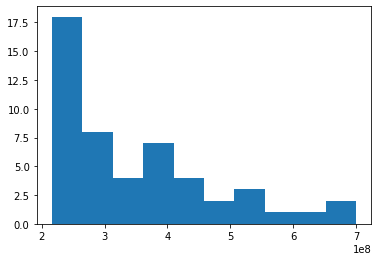

In [ ]:
pyplot.hist(df1)
pyplot.show()

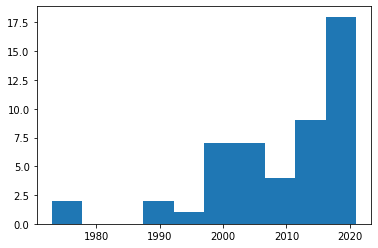

In [ ]:
pyplot.hist(df2)
pyplot.show()

**QQ Plod**

In [ ]:
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


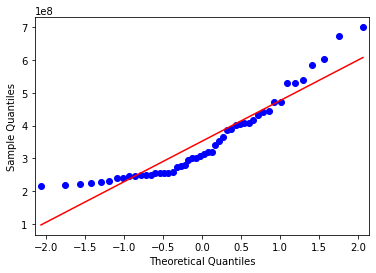

In [ ]:
qqplot(df1, line='s')
pyplot.show()

Есть отклонения на протяжении всего графика, наиболее выявленые в нижней и верхней частях график. 

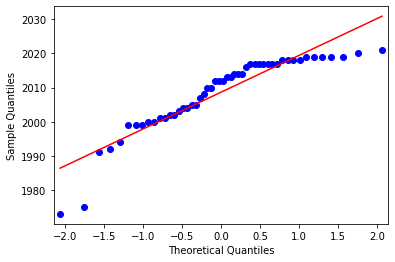

In [ ]:
qqplot(df2, line='s')
pyplot.show()

Можно наблюдать достаточно значительное отклонение от нормали в нижней части графика и незначилельное отклонение в верхней части графика. Посередине графию более менее приближен к нормали.

# Cтатистические тесты нормальности

**Тест Шапиро-Вилка**

In [ ]:
from scipy.stats import shapiro

In [ ]:
stat, p = shapiro(df1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian(fail to reject H0)')
else:
  print('Sample does not looks Gaussian(reject H0)')


Statistics=0.879, p=0.000
Sample does not looks Gaussian(reject H0)


In [ ]:
stat, p = shapiro(df2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian(fail to reject H0)')
else:
  print('Sample does not looks Gaussian(reject H0)')


Statistics=0.857, p=0.000
Sample does not looks Gaussian(reject H0)


**Тест д'Агостино на K^2**

In [ ]:
from scipy.stats import normaltest

In [ ]:
stat, p = normaltest(df1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian(fail to reject H0)')
else:
  print('Sample does not looks Gaussian(reject H0)')

Statistics=9.440, p=0.009
Sample does not looks Gaussian(reject H0)


In [ ]:
stat, p = normaltest(df2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian(fail to reject H0)')
else:
  print('Sample does not looks Gaussian(reject H0)')

Statistics=18.233, p=0.000
Sample does not looks Gaussian(reject H0)


**Тест Андерсона-Дарлинга**

In [ ]:
from scipy.stats import anderson

In [ ]:
result = anderson(df1)
print('Statistic: %.3f' % result.statistic)
p=0 
for i in range(len(result.critical_values)):
  s1, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, df1 looks normal (fail to reject H0)' % (s1, cv))
  else:
    print('%.3f: %.3f, df1 does not looks normal (reject H0)' % (s1, cv))


Statistic: 1.930
15.000: 0.538, df1 does not looks normal (reject H0)
10.000: 0.613, df1 does not looks normal (reject H0)
5.000: 0.736, df1 does not looks normal (reject H0)
2.500: 0.858, df1 does not looks normal (reject H0)
1.000: 1.021, df1 does not looks normal (reject H0)


In [ ]:
result = anderson(df2)
print('Statistic: %.3f' % result.statistic)
p=0 
for i in range(len(result.critical_values)):
  s1, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, df2 looks normal (fail to reject H0)' % (s1, cv))
  else:
    print('%.3f: %.3f, df2 does not looks normal (reject H0)' % (s1, cv))


Statistic: 1.915
15.000: 0.538, df2 does not looks normal (reject H0)
10.000: 0.613, df2 does not looks normal (reject H0)
5.000: 0.736, df2 does not looks normal (reject H0)
2.500: 0.858, df2 does not looks normal (reject H0)
1.000: 1.021, df2 does not looks normal (reject H0)


# Таблица

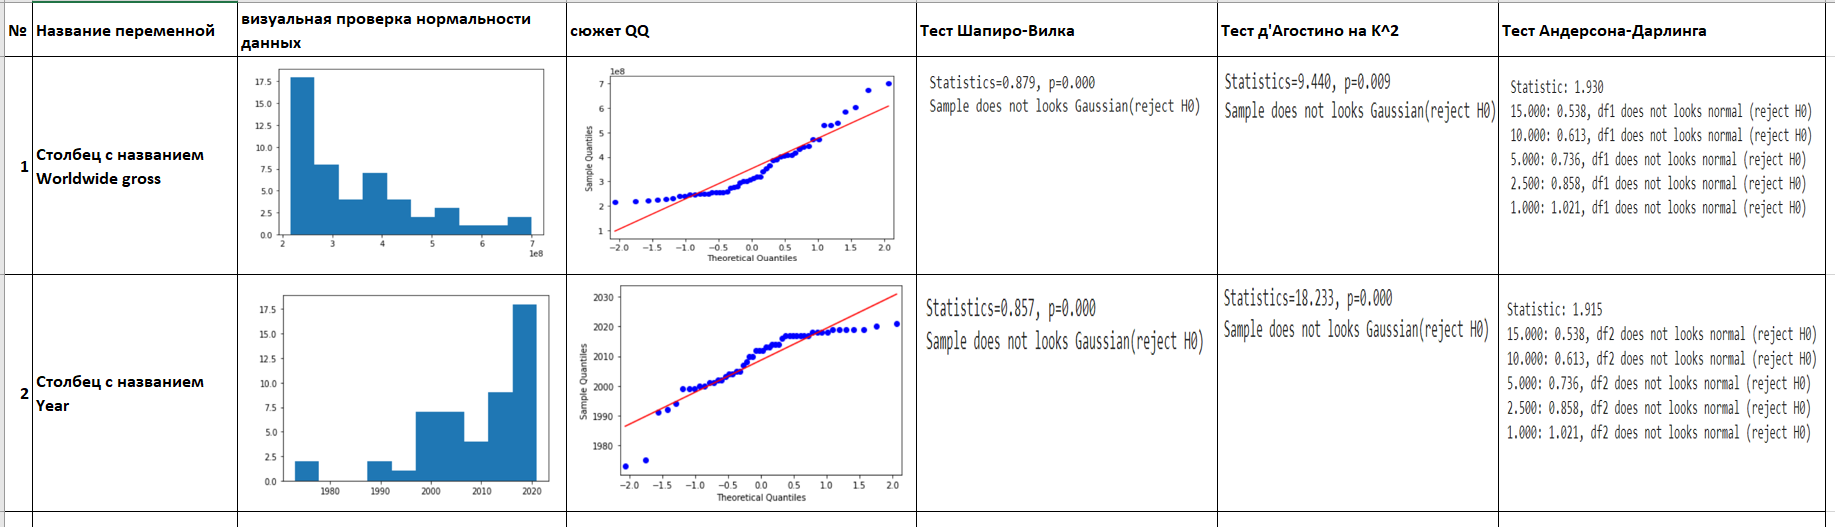